THIS IS SIMPLE FACE RECOGNITION ALGORITHM THAT USES PCA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

In [ ]:
import cv2
import os
import pandas as pd

folder_path = "/Users/nimitt/Documents/Problems/Train_Images"
df = pd.DataFrame(columns=["image_data"])
for filename in os.listdir('/Users/nimitt/Documents/Problems/Train_Images'):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image=np.mean(image,-1)
        image_data = image.reshape(480*640)
        df = df.append({"image_data": image_data}, ignore_index=True)
df.to_csv("image_dataset.csv", index=False)

In [3]:
images_data=np.array(df['image_data'])

In [4]:
num_img=len(df['image_data'])
X_=np.zeros((num_img,640*480))
for i in range(num_img):
    for j in range(640*480):
        X_[i][j]=df['image_data'][i][j]


(307200, 104)


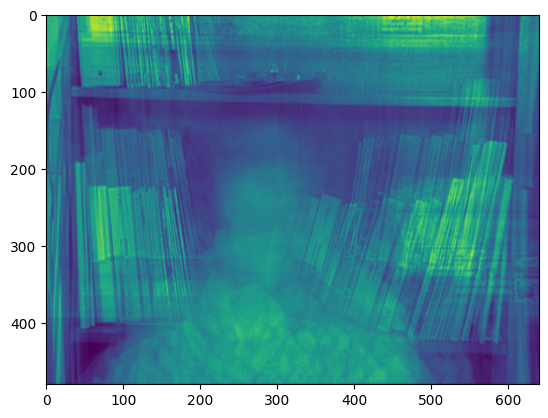

In [5]:
X=np.transpose(X_)
X_mean=np.mean(X,axis=1)
print(X.shape)
B=X-(X_mean@np.ones(X.shape))

U,S,VT=np.linalg.svd(B,full_matrices=False)
plt.imshow(X_mean.reshape(480,640))

<function matplotlib.pyplot.show(close=None, block=None)>

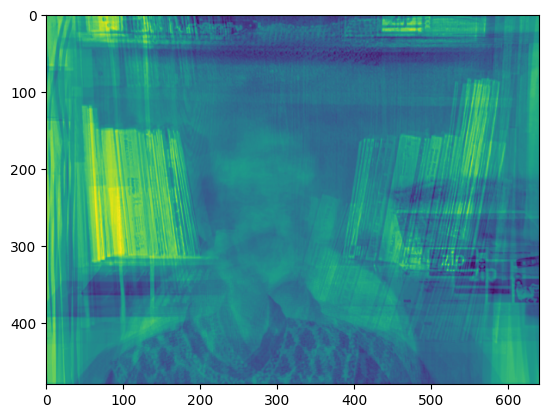

In [6]:
frac=1
r=int(num_img*frac)
PC=U.T
PC_r=PC[:r]

U_r=U[:,:r]

plt.imshow(PC[2].reshape(480,640))
plt.show

In [7]:
alpha_all=np.zeros((num_img,r))
for i in range(num_img):
    alpha_cur=PC_r@images_data[i]
    for j in range(r):
        alpha_all[i][j]=alpha_cur[j]
alpha_all

array([[-46407.33600114,  21110.45387627,   4772.68066181, ...,
          -177.80747894,   -178.52919131,   -114.33061442],
       [-50320.47802178,  -3762.7502621 , -15195.72208185, ...,
          -232.44025621,   -137.72188779,   -135.61966533],
       [-51132.08788356,  -5473.051647  , -15819.69324525, ...,
          -202.32262666,   -122.3470219 ,   -144.68760121],
       ...,
       [-51636.8672207 ,  -5789.33892987, -15277.79554577, ...,
          -204.74570999,   -158.93946308,   -143.21862498],
       [-48163.70362083,  11474.03142961,    338.68188761, ...,
          -208.62834767,   -153.01597692,   -173.62108251],
       [-48960.97749678,   9733.26583623,   1426.40827689, ...,
          -223.76582904,   -141.08579724,   -143.32926274]])

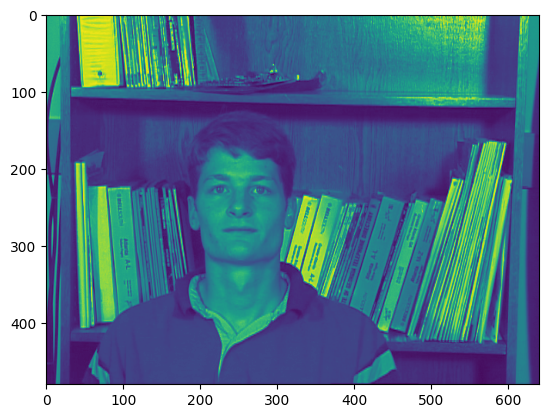

In [8]:
test_image=cv2.imread('/Users/nimitt/Documents/Problems/Test_Images/P7_15.jpg')
test_image=np.mean(test_image,-1)
plt.imshow(test_image)
plt.show()
test_image=test_image.reshape(480*640)

(104,)
(307200, 104)


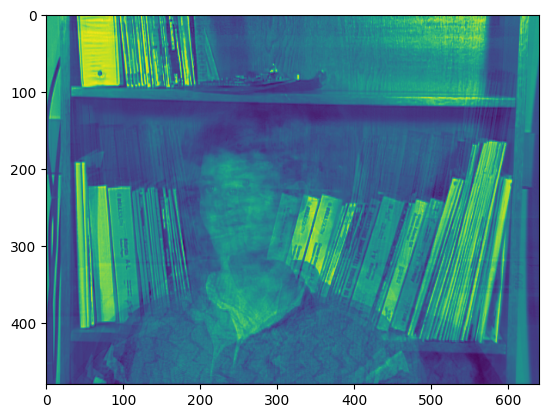

In [16]:
alpha_test=PC_r@test_image
print(alpha_test.shape)
print(U_r.shape)
formed_image=X_mean+U_r@alpha_test
plt.imshow(formed_image.reshape(480,640))

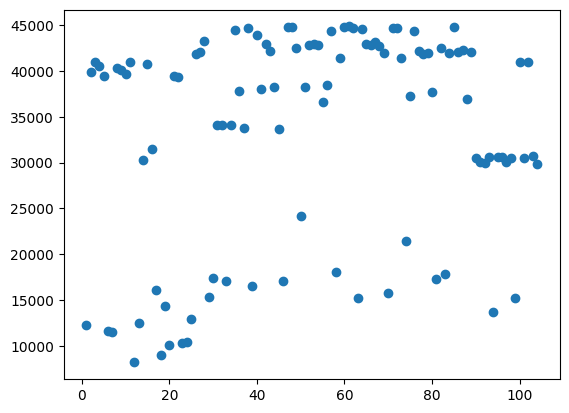

In [10]:
comp=np.zeros(num_img)
for k in range(num_img):
    comp[k]=np.linalg.norm(alpha_test-alpha_all[k])
plt.scatter(np.arange(num_img)+1,comp)

In [11]:
thresh=15000
match=np.where(comp<thresh)
match[0]

array([ 0,  5,  6, 11, 12, 17, 18, 19, 22, 23, 24, 93])

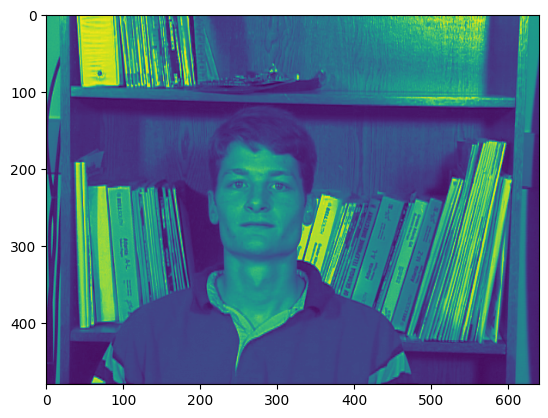

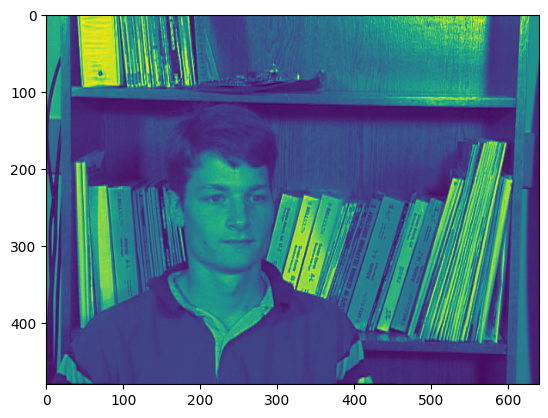

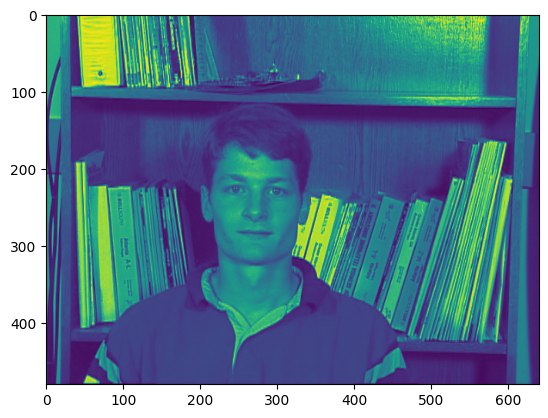

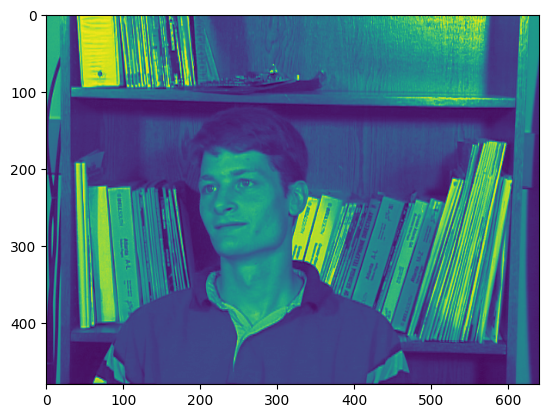

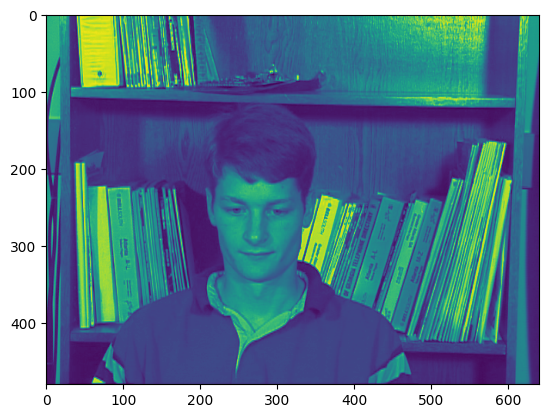

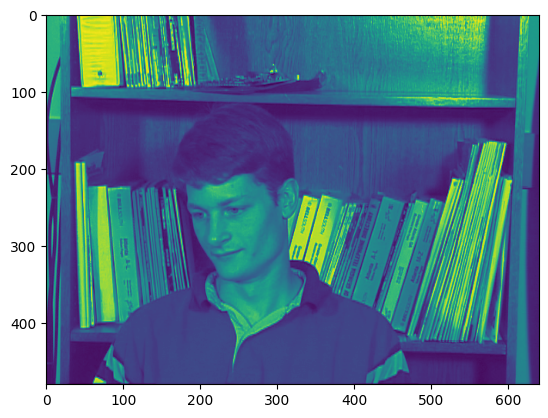

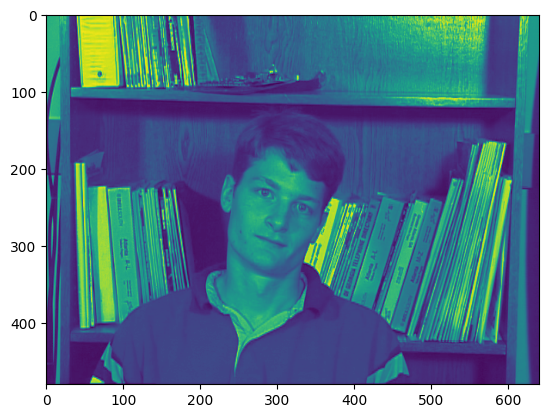

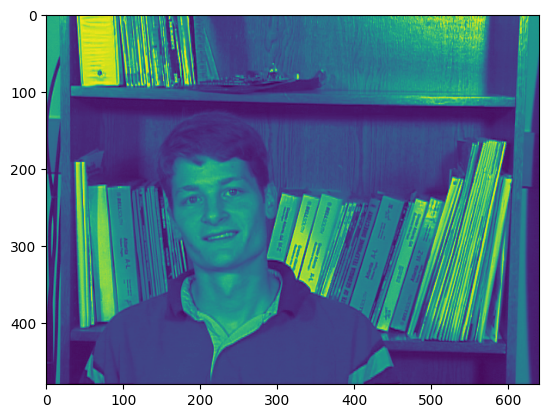

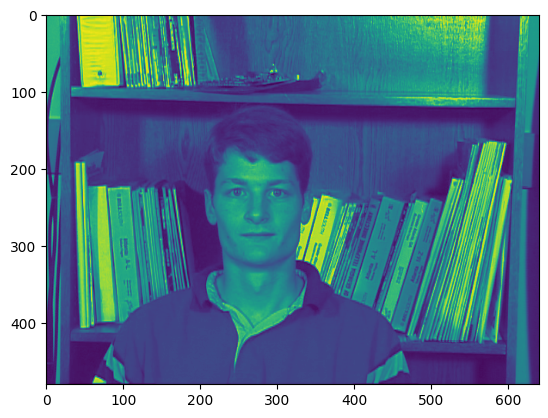

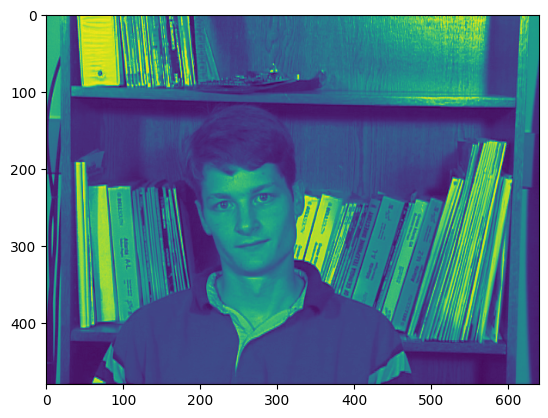

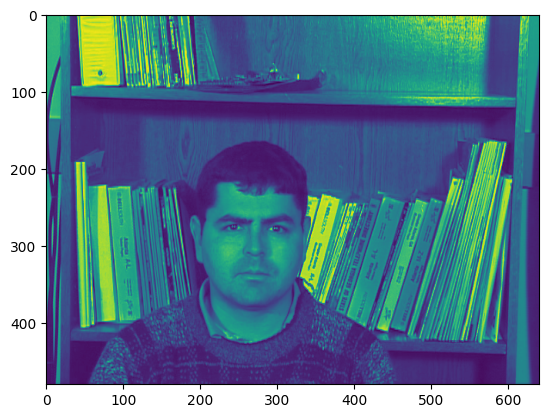

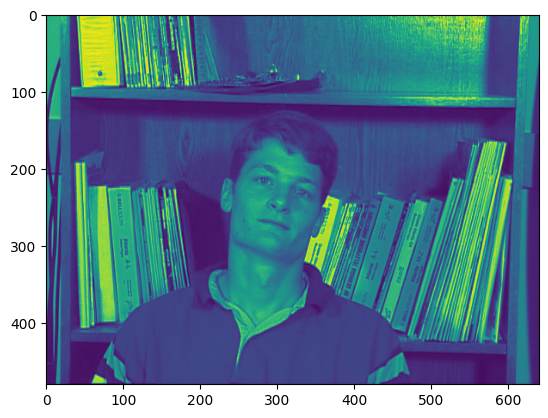

In [12]:
for i in range(len(match[0])):
    plt.imshow(images_data[match[0][i]].reshape(480,640))
    plt.show()

In [13]:
print(len(match[0]),match)

12 (array([ 0,  5,  6, 11, 12, 17, 18, 19, 22, 23, 24, 93]),)
